In [10]:
using Distributed
using Plots
using StatsBase
import QuantumStates
procs_to_use = 4
if nprocs() <= procs_to_use
    addprocs(procs_to_use-nprocs())
end

In [ ]:
@everywhere include("helper_functions.jl")
@everywhere include("define_CaF_SF_cooling.jl")

In [ ]:
prob_SFcooling.p.add_spontaneous_decay_kick = true
n_trajectories = 30
sols = distributed_solve(n_trajectories, prob_SFcooling, prob_func!, scan_nothing, [0]);

In [12]:
prob_SFcooling.p.add_spontaneous_decay_kick = true
n_trajectories = 30
δs = -0.6:0.6:0.6
all_sols = []
for δ ∈ δs
    update_omegas!(prob_SFcooling, δ)
    sols = distributed_solve(n_trajectories, prob_SFcooling, prob_func!, scan_nothing, [0])
    push!(all_sols, sols)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:01:33
Progress: 100%|█████████████████████████████████████████| Time: 0:01:20
Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


In [15]:
sol = all_sols[1];

In [25]:
sol = all_sols[1][1][1]

retcode: Success
Interpolation: 1st order linear
t: 54-element Vector{Float64}:
     0.0
  1000.0
  2000.0
  3000.0
  4000.0
  5000.0
  6000.0
  7000.0
  8000.0
  9000.0
     ⋮
 45000.0
 46000.0
 47000.0
 48000.0
 49000.0
 50000.0
 51000.0
 52000.0
 52150.438049590564
u: 54-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  770.6983604317029, -0.010751691320142082, -0.011907514394073972, 0.014366216471594617, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.13056535172965397, 0.16280799240752716, -0.07787300988769669, -0.09153570414082533, 0.0006681693214896582, 0.0006092655793407066, 0.00042320878309135744, 0.06836896349332763, -0.3450572155068777, 0.1063869706545098  …  785.6404031002312, -0.016076060571820514, -0.014901829297595627, 0.022589028135644163, -0.0024181858698252684, 0.012514739573721475, -0.0013621465691554236, 1.6004125211919915, 0.6505217406111053, -0.2941420895198477]
 [0.05399785071858081, -0.15877652360716943, 0.02615452025362143, 0.06202626674

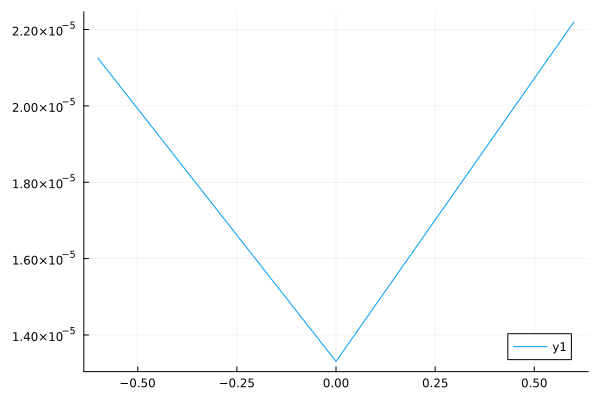

In [28]:
temps = []
for sols ∈ all_sols
    temp = T_ensemble_sol(sols[1])
    push!(temps, temp)
end
plot(δs, temps)

In [5]:
I

127.32395447351628

In [54]:
I

127.32395447351628

In [41]:
Isat

48.74672446082103

In [43]:
beam_radius = 5e-3
Isat = π * h * c * Γ / (3 * λ^3)
P = 0.55 * 13.1e-3 # 13.1 mW/1 V at 1.0 V, factor of 0.55 to match scattering rates
I = 2 * P / (π * beam_radius^2)

total_sat = I / Isat
s1 = total_sat/2
s2 = total_sat/2

1.881909199291939

In [42]:
I

183.47381839633695

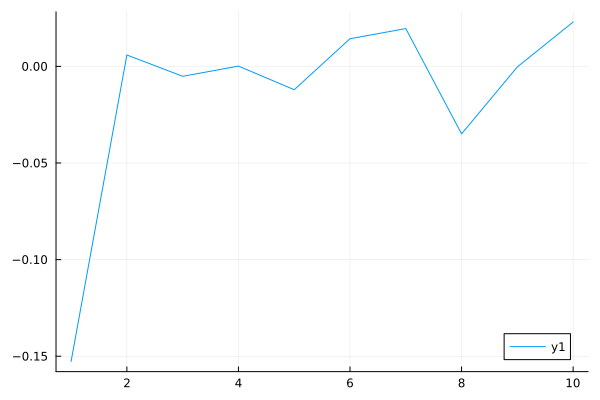

In [68]:
vcoords_end = [vx(sol.u[end]) for sol ∈ sols[1] if survived(sol)]
plot(vcoords_end)

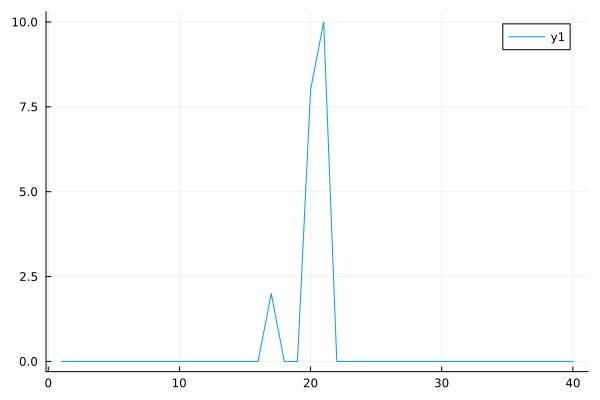

In [69]:
hist_data = StatsBase.fit(Histogram, vcoords_end, -1.0:0.05:1.0)
hist_data.isdensity = true
v = collect(hist_data.edges[1])
dv = v[2] - v[1]
v = v[1:end-1] .+ dv / 2
fv = hist_data.weights ./ (sum(hist_data.weights) * dv)
plot(fv)

In [70]:
v_fit = LsqFit.curve_fit(maxwell_boltzmann_1D, v, fv, [10, 10e-6])

DomainError: DomainError with -4677.33906297881:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

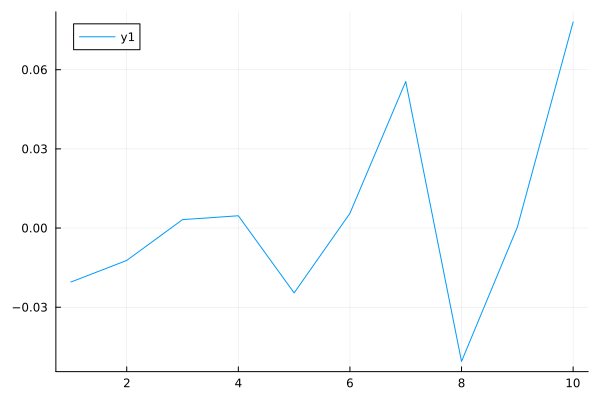

In [71]:
vcoords_end = [vz(sol.u[end]) for sol ∈ sols[1] if survived(sol)]
plot(vcoords_end)

In [38]:
hist_data = StatsBase.fit(Histogram, vcoords_end, -1.0:0.05:1.0)
hist_data.isdensity = true
v = collect(hist_data.edges[1])
dv = v[2] - v[1]
v = v[1:end-1] .+ dv / 2
fv = hist_data.weights ./ (sum(hist_data.weights) * dv)
plot(fv)

UndefVarError: UndefVarError: `vcoords_end` not defined

In [73]:
v_fit = LsqFit.curve_fit(maxwell_boltzmann_1D, v, fv, [10, 10e-6])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([1.033005617915848, 1.9271222644343238e-5], [7.723726745405997e-76, 3.0468672130560604e-68, 4.787284957768115e-61, 2.9959472039727095e-54, 7.467722259805151e-48, 7.4139778410665e-42, 2.9317270559450907e-36, 4.617478811272539e-31, 2.8966459277725854e-26, 7.2376076840701005e-22  …  7.2376076840701005e-22, 2.8966459277725234e-26, 4.617478811272539e-31, 2.931727055945007e-36, 7.4139778410665e-42, 7.467722259805151e-48, 2.995947203972582e-54, 4.787284957768115e-61, 3.0468672130559735e-68, 7.723726745405997e-76], [7.476945537678365e-76 8.296631429058891e-53; 2.9495165952388574e-68 4.997636422752455e-47; … ; 2.9495165952717738e-68 4.997636422752313e-47; 7.476945537678365e-76 8.296631429058891e-53], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [9]:
@. (QuantumStates.energy(states)-2.05092333109709e10)*1e-6

16-element Vector{Float64}:
   0.0
   0.0
   0.0
  76.29376402909851
 122.95149305819702
 122.95149305819702
 122.95149305819702
 147.8178290290985
 147.8178290290985
 147.8178290290985
 147.8178290290985
 147.8178290290985
   4.943794294940349e8
   4.943794294940349e8
   4.943794294940349e8
   4.943794304940349e8

In [16]:
states[5]

State{HundsCaseB_LinearMolecule}(2.06321848040291e10, HundsCaseB_LinearMolecule[HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 3/2, 2, -2, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 1/2, 1, -1, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 3/2, 1, -1, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 3/2, 2, -1, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 1.0:1.0:2.0, M = -2.0:1.0:2.0)), HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 1/2, 0, 0, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_LinearMolecule(0.0, "X", 0, 0, 0, 1/2, 1/2, 0, 0, 0, 1, 1/2, 1, 0, (K = 0, N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_LinearMolecu

In [6]:
length(sols)

1

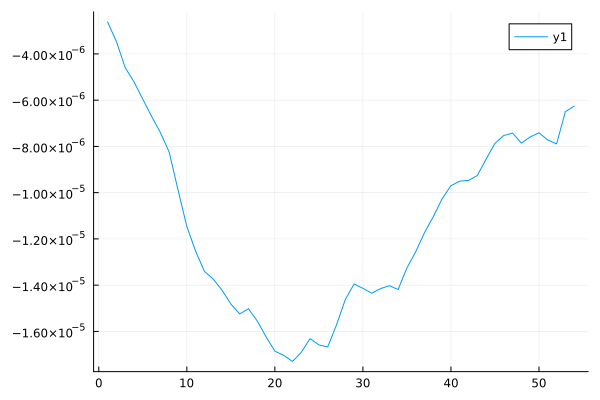

In [29]:
plot(z.(sols[1][1].u))

In [62]:
Tx_fit(sols[1]) |> display
Ty_fit(sols[1]) |> display
Tz_fit(sols[1]) |> display

2.1011016788835044e-5

2.1533718582597124e-5

6.9455348908500695e-6

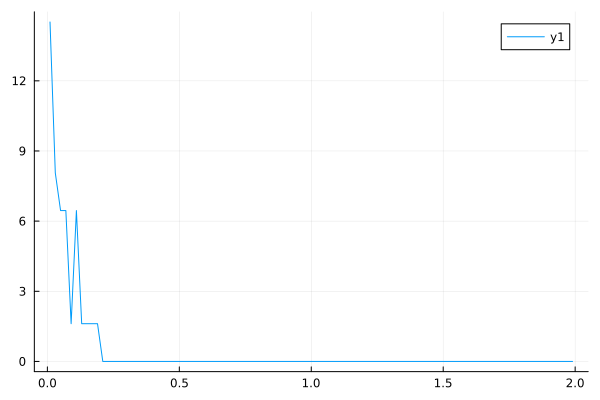

In [65]:
vxs = [vx(sol.u[end]) for sol ∈ sols[1] if survived(sol)]
vys = [vy(sol.u[end]) for sol ∈ sols[1] if survived(sol)]
vzs = [vz(sol.u[end]) for sol ∈ sols[1] if survived(sol)]

vs = sqrt.(vxs .^ 2 .+ vys .^ 2 .+ vzs .^ 2)
hist_data = fit(Histogram, vs, 0:0.02:2.0)
hist_data.isdensity = true
v = collect(hist_data.edges[1])
dv = v[2] - v[1]
v = v[1:end-1] .+ dv / 2
fv = hist_data.weights ./ (sum(hist_data.weights) * dv)
plot(v, fv)


In [49]:
fv

100-element Vector{Float64}:
  0.0
  1.6129032258064517
  1.6129032258064517
  1.6129032258064517
  3.2258064516129035
  6.451612903225807
 12.903225806451614
  3.2258064516129035
  8.064516129032258
  0.0
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

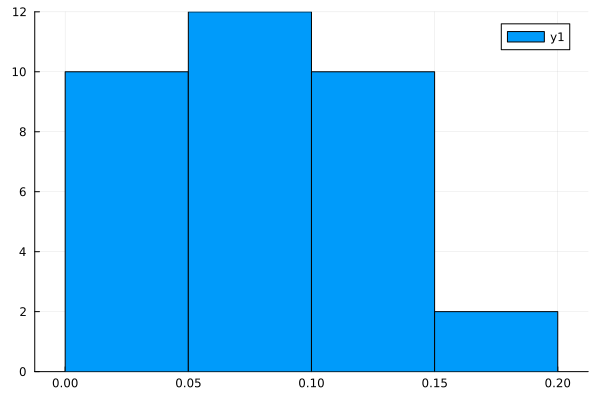

In [64]:
histogram(vs)

In [63]:
T_ensemble_sol(sols[1])

2.18115728208405e-5

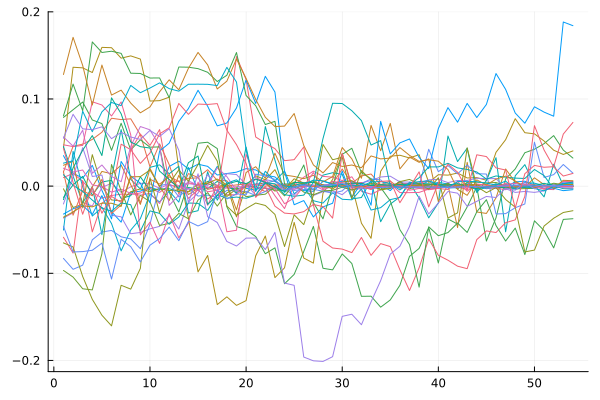

In [14]:
plot()
for i ∈ 1:30
    plot!(vx.(sols[1][i].u))
end
plot!(legend=nothing)

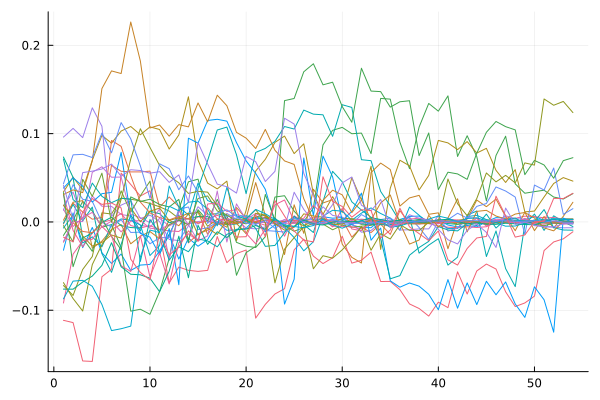

In [11]:
plot()
for i ∈ 1:30
    plot!(vy.(sols[1][i].u))
end
plot!(legend=nothing)

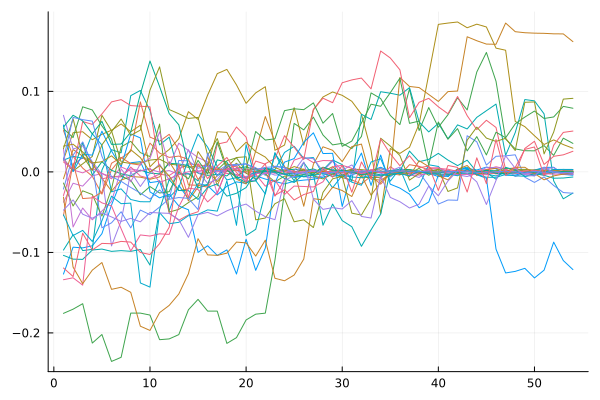

In [12]:
plot()
for i ∈ 1:30
    plot!(vz.(sols[1][i].u))
end
plot!(legend=nothing)